[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
confusion_matrix :  [[210   0]
 [ 11   1]]
accuracy :  0.9504504504504504
precision :  1.0
recall :  0.08333333333333333
f1 score :  0.15384615384615385


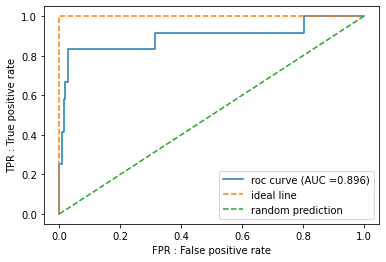

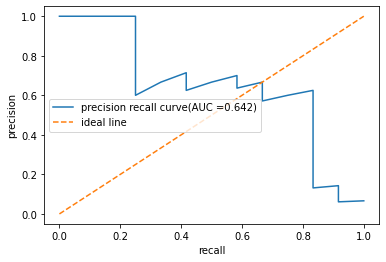

In [24]:
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터의 편향을 크게 잡아서 예측과 평가를 해보자
# survived = 1의 수를 5% 줄인 결과를 예측해보자
# 편향이 있는 데이터의 경우 일반데이터에 비해 정답률이 ROC 곡선보다 PR이 활성화된다.

# 1단계 전처리
df = sns.load_dataset('titanic')
df.head()

drop_list = ['deck','alive']
df = df.drop(drop_list, axis=1)
df = df.dropna()

# 2단계 survived = 1의 변수를 제거하고 그중에서 5% 무작위 샘플링하자
res = df[df['survived']==1]   #pandas.core.frame.DataFrame

res = res.sample(frac = 0.07, random_state=0)
res

# 3단계 res 데이터에 데이터 세트에서 추출한 사망자의 데이터를 결합하자
res02 = df[ df["survived"]==0 ]
df = pd.concat([res, res02])
df

# 4단계 더미변수
x = pd.get_dummies(df.drop("survived", axis = 1))
y = df["survived"]

# 대상 데이터 확인
pd.Series.value_counts(y)  #사망자 424명  생존자 14명

# 5단계 머신러닝 구현
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.5, random_state=0)
ir = LogisticRegression(max_iter=1000, random_state=0) # 1000번을 반복해서 판정을 한다.
ir.fit(X_train, Y_train) #학습을 한다

# 학습 데이터 판정 결과를 test 데이터로 확인하자
y_pred = ir.predict(X_test)
print(y_pred)

# 지표 산출
print('confusion_matrix : ', confusion_matrix(Y_test, y_pred))
print('accuracy : ', accuracy_score(Y_test, y_pred))
print('precision : ', precision_score(Y_test, y_pred))
print('recall : ', recall_score(Y_test, y_pred))
print('f1 score : ', f1_score(Y_test, y_pred))

#테스트 데이터가 클래스 1에 속하는 확률을 예측하고 그 확률에서 FPR, TPR, 임계값을 계산해보자
Y_score = ir.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

# 그래프 확인
plt.plot(fpr,tpr, label='roc curve (AUC =%.3f)' %auc(fpr,tpr))
plt.plot([0,0,1],[0,1,1], linestyle='--', label = 'ideal line')
plt.plot([0,1],[0,1], linestyle='--', label = 'random prediction')
plt.legend()
plt.xlabel('FPR : False positive rate')
plt.ylabel('TPR : True positive rate')
plt.show()

#PR 곡선

probas_pred = ir.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(Y_test, probas_pred)

plt.plot(recall,precision, label='precision recall curve(AUC =%.3f)' %auc(recall, precision))
plt.plot([0,1],[0,1], linestyle='--', label = 'ideal line')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [25]:
import pandas as pd

df = pd.read_csv('sample_ML.csv', index_col = 'name')
df

,height,weight
name,,
A,160cm,49kg
B,170cm,37kg
C,1.81m,80
D,NaN,50kg
E,1.90m,80
F,170cm,NaN
G,150cm,40
